In [2]:
import importlib
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from os.path import join
import os
import seaborn as sns
from torchvision.ops.misc import interpolate
import pickle
import glob
#### Custum libraries
import lib.algos_maxRSA as max_rsa
import lib.utils_RSA as rsa
import lib.utils_CKA as cka
from lib.algos import *


importlib.reload(rsa)
importlib.reload(cka)
importlib.reload(max_rsa)

<module 'lib.algos_maxRSA' from '/home/alban/projects/SAYCam_Vs_EGO4D/lib/algos_maxRSA.py'>

In [3]:
listpickles_ecoVal_Truenormalize = glob.glob('/home/alban/Documents/results_image_selection/ecoVal_*.pkl')
RESULTS = {}
for p, pkl in enumerate(listpickles_ecoVal_Truenormalize):
    name = pkl.split('/')[-1][:-4]
    f = open(pkl,"rb")
    RESULTS[name] = pickle.load(f)
    f.close()

In [4]:
list_names = [k for k in RESULTS.keys()]
similarities = {}

for n, name in enumerate(list_names):
    similarities[name] = [RESULTS[name]['similarity_dict'][pair]['similarity'] for pair in RESULTS[name]['similarity_dict'].keys()]

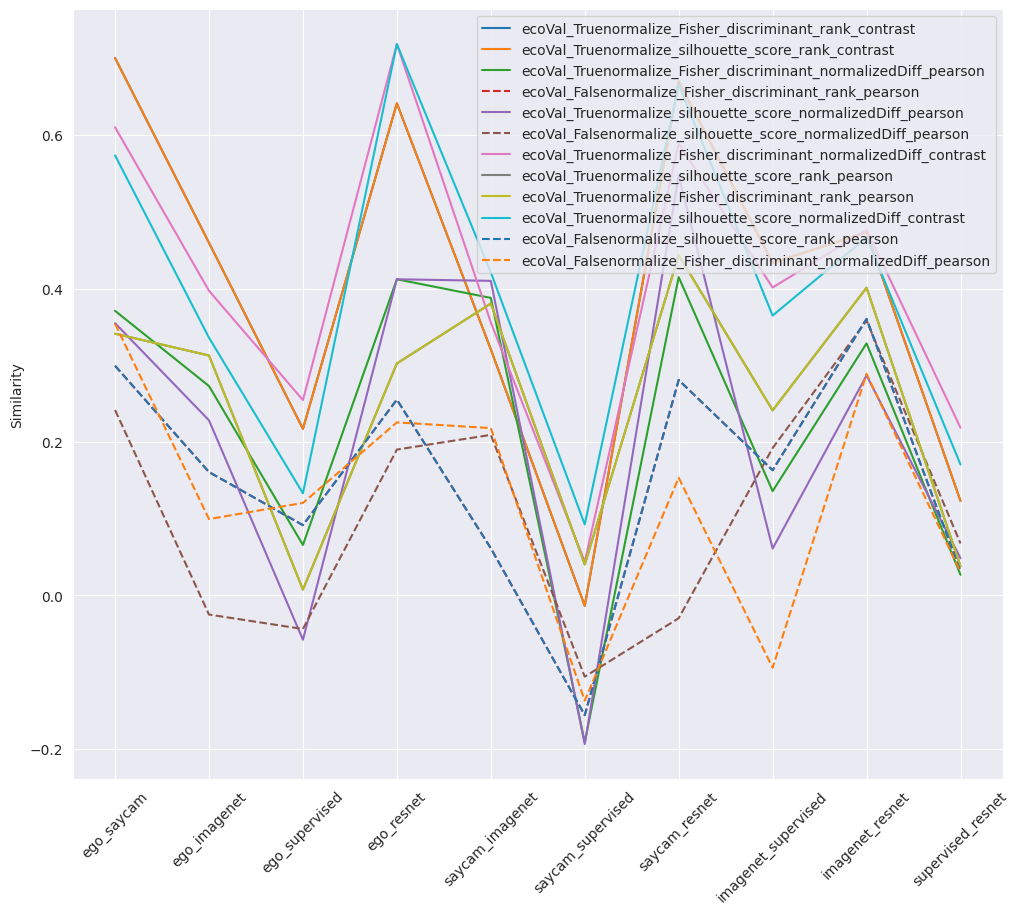

In [6]:
fig, ax = plt.subplots(figsize = (12,10))
for name in similarities.keys():
    if 'Falsenormalize' in name:
        plt.plot(similarities[name], label = name, ls = '--')
    else:
        plt.plot(similarities[name], label = name)
plt.ylabel('Similarity')
plt.xticks(list(range(10)), [pair for pair in RESULTS[name]['similarity_dict'].keys()], rotation = 45)
plt.legend(loc = 'upper right')
plt.show()

In [31]:
[pair for pair in RESULTS[name]['similarity_dict'].keys()]

['ego_saycam',
 'ego_imagenet',
 'ego_supervised',
 'ego_resnet',
 'saycam_imagenet',
 'saycam_supervised',
 'saycam_resnet',
 'imagenet_supervised',
 'imagenet_resnet',
 'supervised_resnet']